In [1]:
%config Completer.use_jedi = False

import numpy as np
from matplotlib import pyplot as plt
import importlib

plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["figure.dpi"] = 72
plt.rcParams["figure.figsize"] = [12,8]

In [ ]:
import ising_model

N=87
engine = ising_model.SimulateMH(N,N,1,1,-1)
engine.random_init()
engine.set_T(100)

engine.make_steps(1000000)

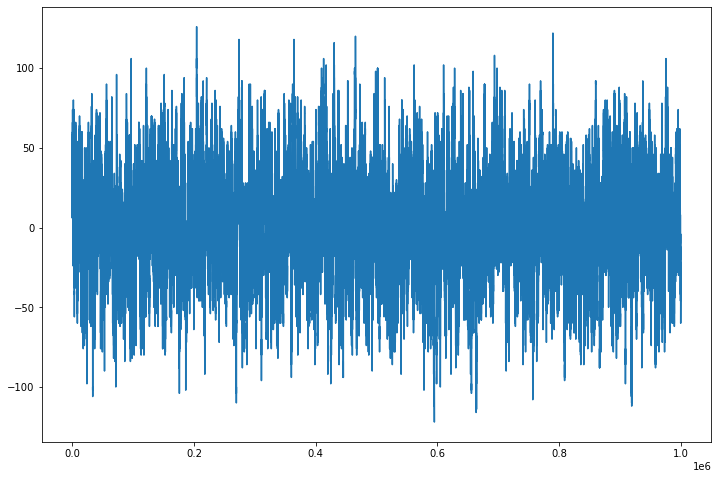

In [15]:
plt.plot(engine.get_sampled_M())

In [3]:
ising_model.Base.get_state

<module 'ising_model' from 'D:\\Ashot\\Desktop\\ising-model\\python\\ising_model.cp38-win_amd64.pyd'>

In [3]:
from ising_model import SimulateM

ImportError: generic_type: type "Base" is already registered!

In [6]:
engine = Simulate_MH(32, 32, 10, 0, 5)

In [8]:
np.log(32+2-1)/np.log(2.0)+1

6.044394119358453

In [9]:
to_run(1, 1_000_000, 10, 32, 10000000, np.random.randint(10000000))

(array([], dtype=int32), array([], dtype=int32))

In [10]:
%%timeit
to_run(1, 1_000_000, 10, 32, 100, np.random.randint(10000000))

80.4 ms ± 1.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
%%timeit
to_run(1, 1_000_000, 0.1, 32, 10, np.random.randint(10000000))

76.3 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
SEED = np.random.randint(100000000)
# SEED = 14702218
Ms, Es, engine = to_run(1, 10_000_000, 0.1, 32, 100, SEED, True)

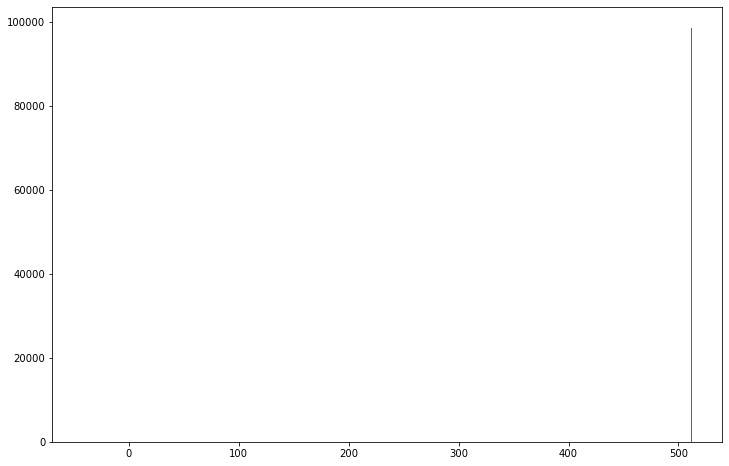

In [9]:
Mss = Ms//2
plt.hist(Mss, bins=(Mss.max()-Mss.min()), range=(Mss.min(), Mss.max()), log=False);

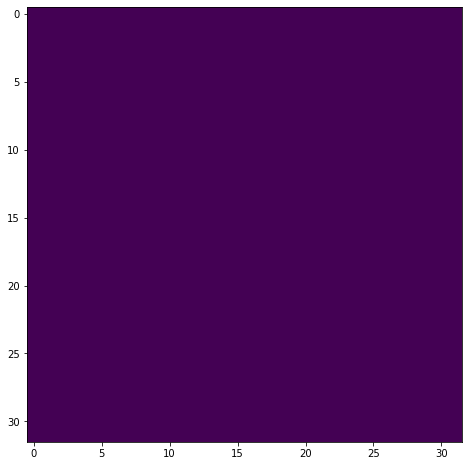

In [10]:
plt.imshow(engine.get_state()+1)

In [11]:
q = 10
i=0
while q > 0:
    SEED = np.random.randint(100000000)
    # SEED = 14702218
    Ms, Es, engine = to_run(1, 1_000_000, 0.1, 32, 10000, SEED, True)
    if abs(engine.get_M())<1024:
        print(i)
        q-=1
        plt.subplot(121)
        plt.plot(engine.get_sampled_M())
        plt.subplot(122)
        plt.imshow(engine.get_state()+1)
        plt.show()
    i+=1

KeyboardInterrupt: 

In [12]:
i

222

In [16]:
Ms

array([  38,   26,   18, ..., 1024, 1024, 1024])

In [14]:
pool = Pool(7)

In [15]:
runs = 100
Ts = np.linspace(0,6,runs+1)[1:]
result = pool.starmap(to_run, 
        np.stack((np.arange(runs),
                  [1_000_000]*runs, # steps
                  Ts, # temperature
                  [32]*runs, # lattice size
                  [10]*runs, # frequency
                  np.random.randint(0,1000000, runs)), axis=1)
    )

In [16]:
meanMs = []
errMs = []
for i,(Ms, Es) in enumerate(result):
    mean, err = mean_with_err(Ms[-Ms.shape[0]//3:])
    meanMs.append(mean)
    errMs.append(err)

<ErrorbarContainer object of 3 artists>

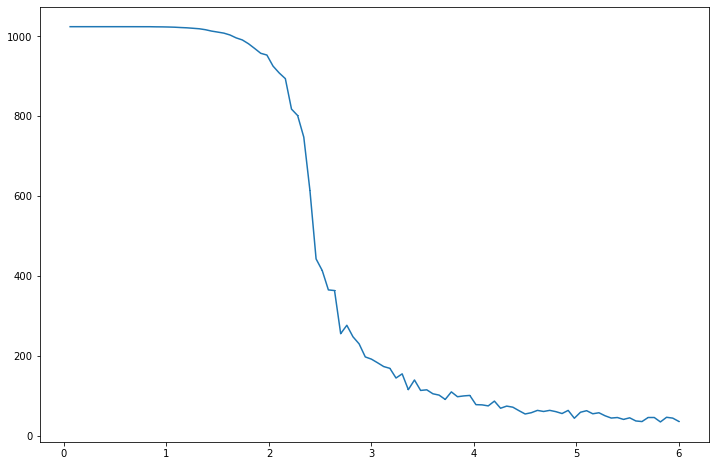

In [17]:
plt.errorbar(Ts, np.abs(meanMs),yerr=errMs)
# for t, m in zip(Ts, np.abs(meanMs)):
#     plt.gca().annotate(f'{t:0.2f}', (t,m))

-75.99894527472527
1022.3768534065936
882.5779731868132
1.3013745054945058
1.9174492307692306
0.6913013186813187
0.2534738461538461
0.4389457142857143
-1.108323296703297
-0.2769358241758242
-0.6154857142857144
0.050426373626373616
0.03948197802197803
-0.7627142857142858
0.41276329670329664
0.6212892307692306
-0.42940131868131864
0.32092483516483516
0.8835804395604394
0.6086885714285715


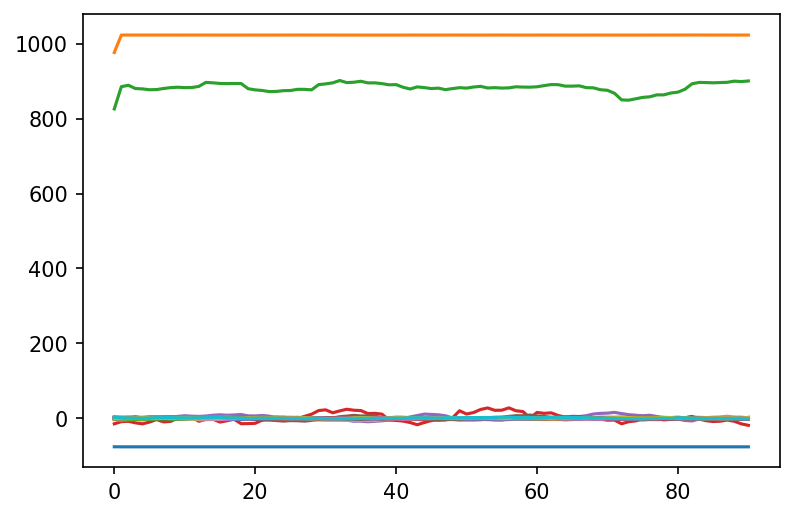

In [15]:
sp = 1

for i,(Ms, Es) in enumerate(result):
#     print(i, end="")
    mean, err = moving_mean_err(Ms, 10**5, stride=10000)
    print(mean.mean())
    plt.errorbar(np.arange(len(mean))[::sp], mean[::sp], yerr=err[::sp], ecolor="orange", label=f"{i}")
# plt.legend()

In [6]:
engine.FLIPS

0

In [ ]:
np.